In [1]:
# Split the txt file at ','
# Good example, T4 with cleanup 13
# T7 - missing edge
with open('AVG_20170124_I07_001-Scene-4-P2-10000.txt','r') as f:
    a = [l.split(',') for l in f]

# Get x and y co-ordinates
import numpy as np
x,y, X, Y = [],[], [],[]

for num in a:
    if len(num) == 2:
        x.append(int(num[0]))
        y.append(int(num[1].strip('\n')))
    if len(num) == 1:
        X.append(x)
        Y.append(y)
        x = []
        y = []
X.append(x)
Y.append(y)
X.pop(0)
Y.pop(0)



[]

In [2]:
# plot stuff
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.set(xlim =[0,600], ylim = [0,600], aspect = 1)

for i in range(len(X)):
    ax.plot(X[i], Y[i], lw = 4)
    ax.plot(X[i][0], Y[i][0], markersize = 2)
    ax.plot(X[i][-1], Y[i][-1], markersize = 2)

# plt.show()



In [3]:
import sys
sys.path.insert(0, '../cell_soap/')
from cell_describe import node, edge, cell, colony, data, manual_tracing

ex = manual_tracing(X, Y)

nodes, edges, new = ex.cleanup(10)

print('Number of edges:',len(X),len(edges) )


cells = ex.find_cycles(edges)

print('Number of cells:',len(cells))

Number of edges: 268 254
Number of cells: 63


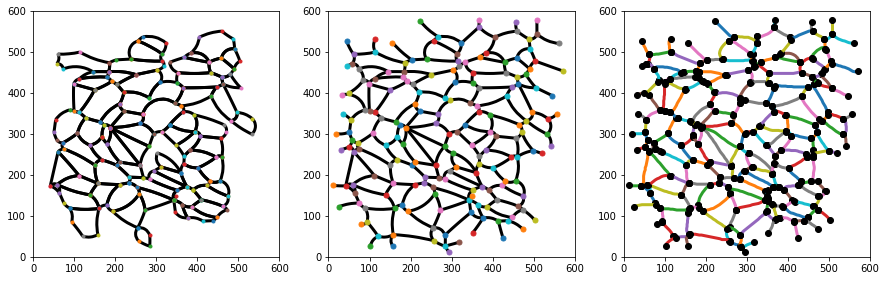

In [4]:


# Plot fitted edges

fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize = (15,8))
ax1.set(xlim =[0,600], ylim = [0,600], aspect = 1)
#ax1.set(xlim = [400,800], ylim = [0,800], aspect = 1)
ax.set(xlim =[0,600], ylim = [0,600], aspect = 1)
ax2.set(xlim =[0,600], ylim = [0,600], aspect = 1)
[c.plot(ax, lw = 3) for c in cells]

[n.plot(ax1, markersize = 10) for n in nodes]
[n.plot(ax1, markersize = 20) for n in nodes if len(n.edges) == 2]
[e.plot(ax1, lw = 3) for e in edges]

# [n.plot(ax2, markersize = 10) for n in nodes]
# [n.plot(ax2, markersize = 20) for n in nodes if len(n.edges) == 2]
# [e.plot(ax2, lw = 3) for e in edges]

for i in range(len(X)):
    ax2.plot(X[i], Y[i], lw = 3)
    ax2.plot(X[i][0], Y[i][0], 'ok')
    ax2.plot(X[i][-1], Y[i][-1], 'ok')


plt.show()

In [ ]:
# Get tension and pressure
edges2 = [e for e in edges if e.radius is not None]
col1 = colony(cells, edges2, nodes)
tensions, P_T, A = col1.calculate_tension()

pressures, P_P, B = col1.calculate_pressure()

0.2
[0.45, 0.17, 0.85, 0.67, 0.0, 0.38, 0.63, 0.53, 0.75, 0.03, 1.0, 0.09, 0.44, 0.98, 0.99, 0.97, 0.15, 0.94, 0.44, 0.63, 0.04, 0.84, 0.37, 0.01, 0.29, 0.52, 0.11, 0.39, 0.78, 0.8, 0.76, 0.31, 0.59, 0.62, 0.71, 0.13, 0.4, 0.5, 0.64, 0.35, 0.92, 0.26, 0.56, 0.37, 0.73, 0.63, 0.87, 0.6, 0.85, 0.87, 0.63, 0.34, 0.11, 0.79, 0.72, 0.74, 0.43, 0.83, 0.34, 0.11, 0.84, 0.57, 1.0, 0.25, 0.49, 0.84, 0.76, 0.68, 0.77, 0.95, 0.44, 0.4, 0.84, 0.01, 0.96, 0.78, 0.62, 0.84, 0.37, 0.28, 0.94, 0.35, 0.43, 0.27, 0.1, 0.72, 0.38, 0.62, 0.7, 0.73, 0.25, 0.64, 0.87, 0.33, 0.17, 0.54, 0.61, 0.48, 0.54, 0.78, 0.81, 0.52, 0.85, 0.69, 0.52, 0.68, 0.27, 0.5, 0.74, 0.26, 0.39, 0.64, 0.11, 0.12, 0.57, 0.55, 0.99, 0.16, 0.66, 0.46, 0.13, 0.92, 0.01, 0.53, 0.71, 0.99, 0.88, 0.45, 0.57, 0.28, 0.13, 0.27, 0.36, 0.83, 0.84, 0.08, 0.16, 0.85, 0.24, 0.63, 0.95, 0.29, 0.73, 0.38, 0.97, 0.82, 0.03, 0.26, 0.68, 0.1, 0.84, 0.87, 0.12, 0.55, 0.01, 0.39, 0.41, 0.03, 0.59, 0.82, 0.1, 0.8, 0.43, 0.0, 0.99, 0.18, 0.22, 0.13, 0.

In [ ]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))
col1.plot_tensions(ax, fig, tensions)

In [ ]:
# Plot 
import pylab
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(8,5))

#col1.plot(ax, fig, tensions, pressures )
col1.plot_pressures(ax, fig, pressures )
[e.plot(ax) for e in col1.edges]
plt.show()